In [5]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import pandas as pd
import os
from treys import Card
from termcolor import colored
from utils import eval_listof_games , debug_listof_games, save_results , load_results
from test import*

import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.morphology import disk, opening, dilation
from skimage.color import rgb2hsv,rgb2gray

from skimage.morphology import white_tophat, black_tophat, disk
from skimage import measure

In [8]:
# load chips 
segments = []
for n in [1,2,3, 10] :
    print("img", n)
    table, _ = register_table(get_img(n)[::4,::4,:])
    segments.append(equalize_table(segment_table(table)))
    del table # delete useless stuff from memory, or my computer crashes :( 

img 1
img 2
img 3
img 10


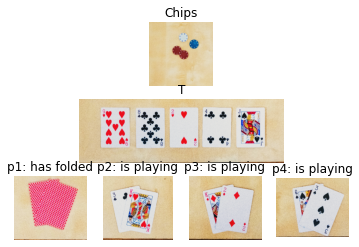

In [10]:
segments[0].show()

In [3]:
def show_img_list(img_list, titles_list=[]): 
    fig, axes = plt.subplots(ncols=len(img_list), figsize=(8, 2))
                             
    while len(titles_list) < len(img_list) :
        titles_list.append('')
                             
    for ax, img, tit in zip(axes, img_list, titles_list) : 
        ax.imshow(img, cmap='gray')
        ax.set_title(tit)
        ax.axis('off')       
    fig.tight_layout()


def clean_binary_img(img):
    """
    use morphology to get rid of small garbage
    """
    return skimage.morphology.binary_opening(skimage.morphology.binary_closing(img, disk(20/2000*img.shape[0])), disk(22/2000*img.shape[0]))
  
    
def get_edg(img) : 
    if img.ptp() > 0  : # catch the case where the green image is monochrome -> this causes otsu to fail and throw an error
        img_edg  = (img > skimage.filters.threshold_otsu(img))
        return img_edg
    else :
        return np.zeros(img.shape)


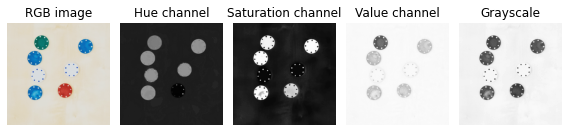

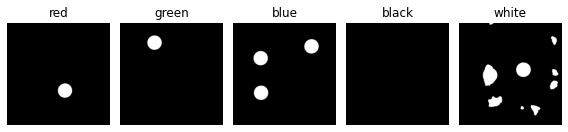

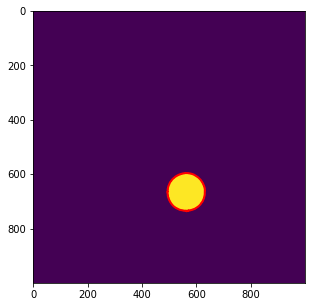

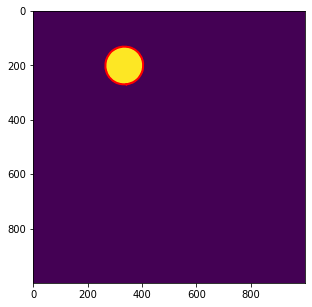

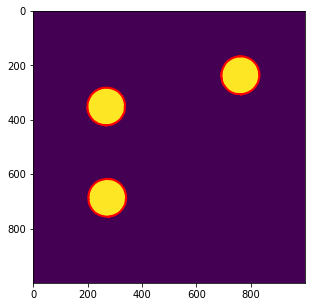

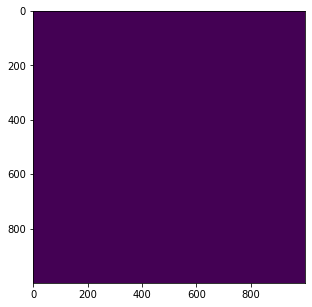

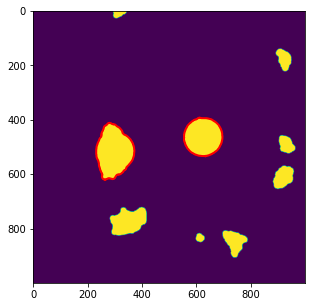

Red  : 1
Green: 1
Blue : 3
Black: 0
White: 2


In [5]:
img = chipss[3]
#show(img)
#CR,CG,CB,CK,CW = get_chips(img, show=False) #don't plot everything
CR,CG,CB,CK,CW = get_chips(img, show=True)
print("Red  :", CR)
print("Green:", CG)
print("Blue :", CB)
print("Black:", CK)
print("White:", CW)